Лабораторная работа №5. "ДРЕВОВИДНЫЕ МОДЕЛИ: РЕШАЮЩИЕ ДЕРЕВЬЯ И ИХ КОМПОЗИЦИИ"

Задание №1.
A). Реализовать DecisionTreeClassifier и DecisionTreeRegressor из Sclearn для соответствующих наборов данных своего варианта. Осуществить настройку гиперпараметров. Выполнить оценку качества модели, визуализировать дерево решений, вывести решающие правила. Сравнить полученные результаты обучения моделей с данными, полученными с помощью PyCaret (открытая low-code библиотека ML на Python, см. Lab5_Ex3 DRs_classifier.ipynb)
B). Реализовать обучение и вычисление дерева с использованием алгоритма CART для задачи регрессии и задачи классификации. Выполнить оценку качества моделей, визуализировать дерево решений, вывести решающие правила.

Задание №2. Применить ансамбли для наборов данных своего варианта:
o BaggingClassifier
o BaggingRegressor

o GradientBoostingClassifier
o GradientBoostingRegressor

o StackingClassifier
o StackingRegressor

Выполнить оценку качества моделей и выбрать лучшую модель.

Задание №3. Реализовать для решения задачи регрессии и задачи классификации следующие библиотеки:
o Catboost,
o XGBoost,
o LightGBM
Выполнить оценку качества моделей и выбрать лучшую модель.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
import os

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
import matplotlib.pyplot as plt
from sklearn import tree

In [2]:
os.chdir('../data')
#Вариант 1
df_regression = pd.read_csv('lab3.csv')
df_classifier = pd.read_csv('lab4.csv')

In [3]:
df_classifier

,flight,dayofweek,time,length,delay,airline_9E,airline_AA,airline_AS,airline_B6,airline_CO,...,airportto_TXK,airportto_TYR,airportto_TYS,airportto_UTM,airportto_VLD,airportto_VPS,airportto_WRG,airportto_XNA,airportto_YAK,airportto_YUM
0,3036,4,1195,131,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,315,7,707,145,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,6673,5,499,42,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3668,2,810,70,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,623,5,985,143,0,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244063,2699,7,910,62,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
244064,3995,2,985,80,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
244065,6474,6,652,138,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
244066,486,7,365,107,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [4]:
df_regression

,year,distance,engine_capacity(cm3),price(euro),make_ARO,make_Abarth,make_Acura,make_Alfa Romeo,make_Alta marca,make_Aston Martin,...,style_Sedan,style_Universal,fuel_type_Diesel,fuel_type_Electric,fuel_type_Hybrid,fuel_type_Metan/Propan,fuel_type_Petrol,fuel_type_Plug-in Hybrid,transmission_Automatic,transmission_Manual
0,2011,195000,1800,7750,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
1,2014,135000,1500,8550,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,True
2,1998,1,1400,2200,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
3,2012,110000,1500,6550,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,True
4,2006,200000,1600,4100,False,False,False,False,False,False,...,False,True,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30058,2002,225000,1800,4400,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
30059,2015,89000,1500,7000,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,True
30060,2009,225,1500,4500,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
30061,2006,370000,2000,4000,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True


In [5]:
df_regression = df_regression.rename(columns={"engine_capacity(cm3)": "enginecapacity", "price(euro)": "price"})

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numeric_features_classifier = ['time','length'] 
df_classifier[numeric_features_classifier] = scaler.fit_transform(df_classifier[numeric_features_classifier])

In [7]:
y_classifier = df_classifier["delay"]
X_classifier = df_classifier.drop(["delay"], axis=1)
X_classifier, _, y_classifier, _ = train_test_split(X_classifier, y_classifier, test_size=0.9, random_state=42)


y_regression = df_regression["price"]
X_regression = df_regression.drop(["price"], axis=1)

In [8]:
X_train_classifier, X_test_classifier, y_train_classifier, y_test_classifier = train_test_split(X_classifier, y_classifier, test_size=0.2)
X_train_regression, X_test_regression, y_train_regression, y_test_regression = train_test_split(X_regression, y_regression, test_size=0.2)

## Реализовать DecisionTreeClassifier и DecisionTreeRegressor из Sclearn для соответствующих наборов данных своего варианта. Осуществить настройку гиперпараметров.

In [9]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
classifier = DecisionTreeClassifier()

param_dist = {
    "criterion": ["gini", "entropy"],
    "max_depth": randint(1, 4),
    "min_samples_split": randint(2, 20),
    "min_samples_leaf": randint(1, 10)
}

clf_random_search = RandomizedSearchCV(classifier, param_distributions=param_dist, n_iter=10, cv=5, random_state=42)
clf_random_search.fit(X_train_classifier, y_train_classifier)

best_classifier = clf_random_search.best_estimator_

In [10]:
regressor = DecisionTreeRegressor()

param_dist = {
    "criterion": ["squared_error", "friedman_mse", "absolute_error", "poisson"],
    "max_depth": randint(1, 4),
    "min_samples_split": randint(2, 20),
    "min_samples_leaf": randint(1, 10)
}

reg_random_search = RandomizedSearchCV(regressor, param_distributions=param_dist, n_iter=10, cv=5, random_state=42)
reg_random_search.fit(X_train_regression, y_train_regression)

best_regressor = reg_random_search.best_estimator_

## Выполнить оценку качества модели, визуализировать дерево решений

In [11]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

def calculate_metrics(model, X, y_true):
    y_pred = model.predict(X)
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return r2, mae, mse, rmse, mape

In [12]:
metrics_classifier = calculate_metrics(best_classifier, X_test_classifier, y_test_classifier)
metrics_regressor = calculate_metrics(best_regressor, X_test_regression, y_test_regression)

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

clf_predictions = best_classifier.predict(X_test_classifier)

print('Accuracy: {:.3f}'.format(accuracy_score(y_test_classifier, clf_predictions)))
print('Precision: {:.3f}'.format(precision_score(y_test_classifier, clf_predictions)))
print('Recall: {:.3f}'.format(recall_score(y_test_classifier, clf_predictions)))
print('F1-score: {:.3f}'.format(f1_score(y_test_classifier, clf_predictions)))
print('ROC-AUC: {:.3f}'.format(roc_auc_score(y_test_classifier, clf_predictions)))

Accuracy: 0.686
Precision: 0.666
Recall: 0.182
F1-score: 0.286
ROC-AUC: 0.567


In [14]:
print(f'MAE: {metrics_regressor[1]}')
print(f'MSE: {metrics_regressor[2]}')
print(f'RMSE: {metrics_regressor[3]}')
print(f'MAPE: {metrics_regressor[4]}')
print(f'R^2: {metrics_regressor[0]}')

MAE: 2170.952544832811
MSE: 8862576.232572444
RMSE: 2977.007932903848
MAPE: 48.13525325900683
R^2: 0.6879310355542181


## Визуализировать дерево решений:

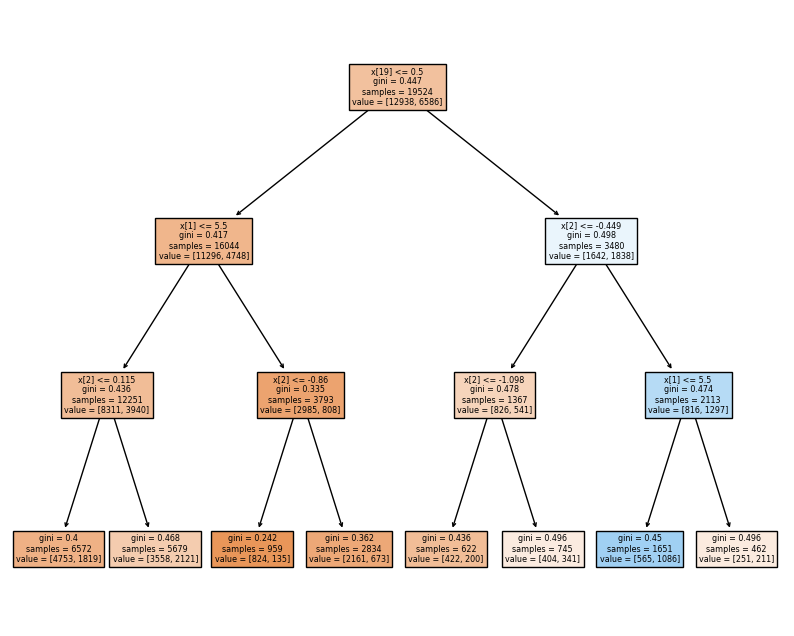

In [15]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plot_tree(best_classifier, filled=True)
plt.show()

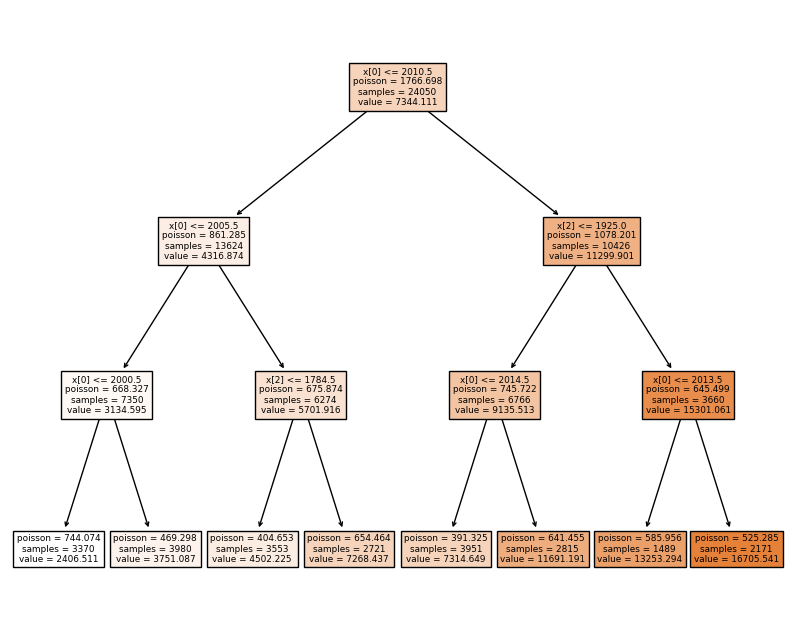

In [16]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plot_tree(best_regressor, filled=True)
plt.show()

## вывести решающие правила

In [17]:
from sklearn.tree import export_text
tree_rules = export_text(best_classifier, feature_names=list(X_classifier.columns))
print(tree_rules)

|--- airline_WN <= 0.50
|   |--- dayofweek <= 5.50
|   |   |--- time <= 0.12
|   |   |   |--- class: 0
|   |   |--- time >  0.12
|   |   |   |--- class: 0
|   |--- dayofweek >  5.50
|   |   |--- time <= -0.86
|   |   |   |--- class: 0
|   |   |--- time >  -0.86
|   |   |   |--- class: 0
|--- airline_WN >  0.50
|   |--- time <= -0.45
|   |   |--- time <= -1.10
|   |   |   |--- class: 0
|   |   |--- time >  -1.10
|   |   |   |--- class: 0
|   |--- time >  -0.45
|   |   |--- dayofweek <= 5.50
|   |   |   |--- class: 1
|   |   |--- dayofweek >  5.50
|   |   |   |--- class: 0



In [18]:
tree_rules = export_text(best_regressor, feature_names=list(X_regression.columns))
print(tree_rules)

|--- year <= 2010.50
|   |--- year <= 2005.50
|   |   |--- year <= 2000.50
|   |   |   |--- value: [2406.51]
|   |   |--- year >  2000.50
|   |   |   |--- value: [3751.09]
|   |--- year >  2005.50
|   |   |--- enginecapacity <= 1784.50
|   |   |   |--- value: [4502.23]
|   |   |--- enginecapacity >  1784.50
|   |   |   |--- value: [7268.44]
|--- year >  2010.50
|   |--- enginecapacity <= 1925.00
|   |   |--- year <= 2014.50
|   |   |   |--- value: [7314.65]
|   |   |--- year >  2014.50
|   |   |   |--- value: [11691.19]
|   |--- enginecapacity >  1925.00
|   |   |--- year <= 2013.50
|   |   |   |--- value: [13253.29]
|   |   |--- year >  2013.50
|   |   |   |--- value: [16705.54]



## PyCaret

In [19]:
#!pip install --pre pycaret

In [20]:
#from pycaret.regression import *

In [21]:
#setup(data=df_regression,  target='price(euro)', session_id=555, train_size=0.7, preprocess=True)

In [22]:
#models()

In [23]:
#dt_reg = create_model(estimator='dt')

In [24]:
#tuned_dt_reg = tune_model(dt_reg)

## Реализовать обучение и вычисление дерева с использованием алгоритма CART для задачи регрессии и задачи классификации.

In [29]:
class CART:
    def __init__(self, task_type, max_depth=None, min_samples_split=2):
        """
        Инициализация объекта класса.
        
        Параметры:
        - task_type: Тип задачи ('regression' для регрессии или 'classification' для классификации).
        - max_depth: Максимальная глубина дерева. Если None, то дерево строится до исчерпания данных.
        - min_samples_split: Минимальное количество образцов, необходимое для разделения узла.
        """
        self.task_type = task_type
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split

    def fit(self, X, y):
        """
        Обучение дерева на обучающих данных X и метках y.
        """
        if isinstance(X, pd.DataFrame):
            X = X.values

        self.root = self._build_tree(X, y, depth=0)

    def _build_tree(self, X, y, depth):
        """
        Рекурсивное построение дерева.
        """
        # Проверка условий для остановки рекурсии
        if (self.max_depth is not None and depth >= self.max_depth) or len(X) <= self.min_samples_split:
            if self.task_type == 'regression':
                # В случае регрессии создаем листовой узел с средним значением
                leaf_value = np.mean(y)
                return {'leaf': True, 'value': leaf_value}
            elif self.task_type == 'classification':
                # В случае классификации создаем листовой узел с информацией о классах и их вероятностях
                class_counts = np.bincount(y)
                class_probability = class_counts / np.sum(class_counts)
                return {'leaf': True, 'class': np.argmax(class_counts), 'probability': class_probability}

        # Находим лучший признак и порог для разделения данных
        best_feature, best_threshold = self._find_best_split(X, y)
        left_child_indices = X[:, best_feature] <= best_threshold
        right_child_indices = X[:, best_feature] > best_threshold

        # Строим узел и рекурсивно строим его дочерние узлы
        node = {
            'feature': best_feature,
            'threshold': best_threshold,
            'left': self._build_tree(X[left_child_indices], y[left_child_indices], depth + 1),
            'right': self._build_tree(X[right_child_indices], y[right_child_indices], depth + 1)
        }
        return node

    def _find_best_split(self, X, y):
        """
        Находим лучший признак и порог для разделения данных.
        """
        if self.task_type == 'regression':
            best_mse = float('inf')
            best_feature = None
            best_threshold = None

            # Перебор признаков
            for feature in range(X.shape[1]):
                thresholds = np.unique(X[:, feature])

                # Перебор порогов для каждого признака
                for threshold in thresholds:
                    left_indices = X[:, feature] <= threshold
                    right_indices = X[:, feature] > threshold

                    mse = self._mse(y[left_indices], y[right_indices])

                    # Обновление лучшего разделения, если MSE лучше
                    if mse < best_mse:
                        best_mse = mse
                        best_feature = feature
                        best_threshold = threshold

            return best_feature, best_threshold
        elif self.task_type == 'classification':
            best_gini = float('inf')
            best_feature = None
            best_threshold = None

            # Перебор признаков
            for feature in range(X.shape[1]):
                thresholds = np.unique(X[:, feature])

                # Перебор порогов для каждого признака
                for threshold in thresholds:
                    left_indices = X[:, feature] <= threshold
                    right_indices = X[:, feature] > threshold

                    gini = self._gini(y[left_indices], y[right_indices])

                    # Обновление лучшего разделения, если Gini лучше
                    if gini < best_gini:
                        best_gini = gini
                        best_feature = feature
                        best_threshold = threshold

            return best_feature, best_threshold

    def _mse(self, left_y, right_y):
        """
        Среднеквадратичная ошибка для разделения данных.
        """
        left_mse = np.mean((left_y - np.mean(left_y))**2)
        right_mse = np.mean((right_y - np.mean(right_y))**2)
        mse = (len(left_y) * left_mse + len(right_y) * right_mse) / (len(left_y) + len(right_y))
        return mse

    def _gini(self, left_y, right_y):
        """
        Gini impurity для разделения данных.
        """
        left_gini = 1 - np.sum((np.bincount(left_y) / len(left_y))**2)
        right_gini = 1 - np.sum((np.bincount(right_y) / len(right_y))**2)
        gini = (len(left_y) * left_gini + len(right_y) * right_gini) / (len(left_y) + len(right_y))
        return gini

    def predict(self, X):
        """
        Прогнозирование для новых данных.
        """
        if isinstance(X, pd.DataFrame):
            X = X.values
        elif isinstance(X, list):
            X = np.array(X)
        if X.ndim == 1:
            X = np.expand_dims(X, 0)

        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        """
        Рекурсивное прохождение по дереву для прогнозирования.
        """
        if 'leaf' in node:
            if self.task_type == 'regression':
                return node['value']
            elif self.task_type == 'classification':
                return node['class']

        feature_value = x[node['feature']]
        
        if not isinstance(feature_value, (int, float)):
            return self._traverse_tree(x, node['left'])
        
        if feature_value <= node['threshold']:
            return self._traverse_tree(x, node['left'])
        else:
            return self._traverse_tree(x, node['right'])

In [30]:
classifier = CART(task_type='classification', max_depth=5, min_samples_split=2)

# Обучение модели на обучающих данных
classifier.fit(X_train_classifier, y_train_classifier)

# Предсказание классов для тестового набора
y_pred_classifier = classifier.predict(X_test_classifier)

# Оценка точности модели
accuracy = accuracy_score(y_test_classifier, y_pred_classifier)
print(f'Accuracy: {accuracy}')

Accuracy: 0.6866038508807866


In [32]:
regressor = CART(task_type='regression', max_depth=5, min_samples_split=2)

# Обучение модели на обучающих данных
regressor.fit(X_train_regression, y_train_regression)

# Предсказание значений для тестового набора
y_pred_regressor = regressor.predict(X_test_regression)

# Оценка среднеквадратичной ошибки модели
r2 = r2_score(y_test_regression, y_pred_regressor)
print('R^2:', r2)

R^2: 0.7552048055595085


## Задание №2. Применить ансамбли для наборов данных своего варианта:

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.ensemble import StackingClassifier, StackingRegressor

In [34]:
# Создание экземпляров моделей
bagging_classifier = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10)
bagging_regressor = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=10)
gradient_boosting_classifier = GradientBoostingClassifier()
gradient_boosting_regressor = GradientBoostingRegressor()
stacking_classifier = StackingClassifier(
    estimators=[('bagging', bagging_classifier), ('gb', gradient_boosting_classifier)],
    final_estimator=LogisticRegression()
)
stacking_regressor = StackingRegressor(
    estimators=[('bagging', bagging_regressor), ('gb', gradient_boosting_regressor)],
    final_estimator=LinearRegression()
)

In [35]:
# Обучение моделей
bagging_classifier.fit(X_train_classifier, y_train_classifier)
bagging_regressor.fit(X_train_regression, y_train_regression)

gradient_boosting_classifier.fit(X_train_classifier, y_train_classifier)
gradient_boosting_regressor.fit(X_train_regression, y_train_regression)

stacking_classifier.fit(X_train_classifier, y_train_classifier)
stacking_regressor.fit(X_train_regression, y_train_regression)

StackingRegressor(estimators=[('bagging',
                               BaggingRegressor(estimator=DecisionTreeRegressor())),
                              ('gb', GradientBoostingRegressor())],
                  final_estimator=LinearRegression())

In [36]:
# Прогнозы на тестовых данных
bagging_classifier_predictions = bagging_classifier.predict(X_test_classifier)
bagging_regressor_predictions = bagging_regressor.predict(X_test_regression)

gradient_boosting_classifier_predictions = gradient_boosting_classifier.predict(X_test_classifier)
gradient_boosting_regressor_predictions = gradient_boosting_regressor.predict(X_test_regression)

stacking_classifier_predictions = stacking_classifier.predict(X_test_classifier)
stacking_regressor_predictions = stacking_regressor.predict(X_test_regression)

In [37]:
# Оценка качества моделей
bagging_classifier_accuracy = accuracy_score(y_test_classifier, bagging_classifier_predictions)
bagging_regressor_accuracy = mean_squared_error(y_test_regression, bagging_regressor_predictions)
gradient_boosting_classifier_accuracy = accuracy_score(y_test_classifier, gradient_boosting_classifier_predictions)
gradient_boosting_regressor_accuracy = mean_squared_error(y_test_regression, gradient_boosting_regressor_predictions)
stacking_classifier_accuracy = accuracy_score(y_test_classifier, stacking_classifier_predictions)
stacking_regressor_accuracy = mean_squared_error(y_test_regression, stacking_regressor_predictions)

print('Bagging Classifier Accuracy:', bagging_classifier_accuracy)
print('Bagging Regressor Accuracy:', bagging_regressor_accuracy)
print('Gradient Boosting Classifier Accuracy:', gradient_boosting_classifier_accuracy)
print('Gradient Boosting Regressor Accuracy:', gradient_boosting_regressor_accuracy)
print('Stacking Classifier Accuracy:', stacking_classifier_accuracy)
print('Stacking Regressor Accuracy:', stacking_regressor_accuracy)

Bagging Classifier Accuracy: 0.6562884063908234
Bagging Regressor Accuracy: 4563070.990906265
Gradient Boosting Classifier Accuracy: 0.6855796804588283
Gradient Boosting Regressor Accuracy: 5236199.498019112
Stacking Classifier Accuracy: 0.6849651782056534
Stacking Regressor Accuracy: 4362646.212912047


## Задание №3. Реализовать для решения задачи регрессии и задачи классификации следующие библиотеки:

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
from catboost import CatBoostRegressor, CatBoostClassifier
from xgboost import XGBRegressor, XGBClassifier
from lightgbm import LGBMRegressor, LGBMClassifier

In [39]:
# Создание экземпляров моделей 
catboost_regressor = CatBoostRegressor()
catboost_classifier = CatBoostClassifier()

xgboost_regressor = XGBRegressor()
xgboost_classifier = XGBClassifier()

lightgbm_regressor = LGBMRegressor(feature_pre_filter=False)
lightgbm_classifier = LGBMClassifier()

In [40]:
X_train_regression.columns = X_train_regression.columns.str.replace('\W', '_')
X_train_classifier.columns = X_train_classifier.columns.str.replace('\W', '_')
X_train_regression = X_train_regression.values
y_train_regression = y_train_regression.values
X_train_classifier = X_train_classifier.values
y_train_classifier = y_train_classifier.values
# Обучение моделей 
catboost_regressor.fit(X_train_regression, y_train_regression)
catboost_classifier.fit(X_train_classifier, y_train_classifier)

xgboost_regressor.fit(X_train_regression, y_train_regression)
xgboost_classifier.fit(X_train_classifier, y_train_classifier)

lightgbm_regressor.fit(X_train_regression, y_train_regression)
lightgbm_classifier.fit(X_train_classifier, y_train_classifier)

Learning rate set to 0.06767
0:	learn: 4961.9249398	total: 147ms	remaining: 2m 27s
1:	learn: 4735.4798903	total: 154ms	remaining: 1m 16s
2:	learn: 4523.9515190	total: 162ms	remaining: 53.7s
3:	learn: 4335.2820042	total: 169ms	remaining: 42s
4:	learn: 4152.3586182	total: 176ms	remaining: 35s
5:	learn: 3985.7746347	total: 183ms	remaining: 30.4s
6:	learn: 3834.3282317	total: 191ms	remaining: 27.1s
7:	learn: 3696.2577140	total: 199ms	remaining: 24.6s
8:	learn: 3572.8698083	total: 205ms	remaining: 22.6s
9:	learn: 3460.6459015	total: 213ms	remaining: 21.1s
10:	learn: 3358.0819694	total: 220ms	remaining: 19.8s
11:	learn: 3267.3206895	total: 228ms	remaining: 18.8s
12:	learn: 3179.7086004	total: 236ms	remaining: 17.9s
13:	learn: 3100.8488919	total: 243ms	remaining: 17.1s
14:	learn: 3028.0087460	total: 251ms	remaining: 16.5s
15:	learn: 2964.4358137	total: 259ms	remaining: 15.9s
16:	learn: 2909.1487747	total: 267ms	remaining: 15.4s
17:	learn: 2855.0878000	total: 275ms	remaining: 15s
18:	learn: 28

LGBMClassifier()

In [41]:
# Прогнозы на тестовых данных
catboost_regressor_predictions = catboost_regressor.predict(X_test_regression)
catboost_classifier_predictions = catboost_classifier.predict(X_test_classifier)

xgboost_regressor_predictions = xgboost_regressor.predict(X_test_regression)
xgboost_classifier_predictions = xgboost_classifier.predict(X_test_classifier)

lightgbm_regressor_predictions = lightgbm_regressor.predict(X_test_regression)
lightgbm_classifier_predictions = lightgbm_classifier.predict(X_test_classifier)

In [42]:
# Оценка качества моделей
catboost_regressor_accuracy = mean_squared_error(y_test_regression, catboost_regressor_predictions)
catboost_classifier_accuracy = accuracy_score(y_test_classifier, catboost_classifier_predictions)

xgboost_regressor_accuracy = mean_squared_error(y_test_regression, xgboost_regressor_predictions)
xgboost_classifier_accuracy = accuracy_score(y_test_classifier, xgboost_classifier_predictions)

lightgbm_regressor_accuracy = mean_squared_error(y_test_regression, lightgbm_regressor_predictions)
lightgbm_classifier_accuracy = accuracy_score(y_test_classifier, lightgbm_classifier_predictions)

# Вывод результатов
print('CatBoost Regressor Accuracy:', catboost_regressor_accuracy)
print('CatBoost Classifier Accuracy:', catboost_classifier_accuracy)

print('XGBoost Regressor Accuracy:', xgboost_regressor_accuracy)
print('XGBoost Classifier Accuracy:', xgboost_classifier_accuracy)

print('LightGBM Regressor Accuracy:', lightgbm_regressor_accuracy)
print('LightGBM Classifier Accuracy:', lightgbm_classifier_accuracy)

CatBoost Regressor Accuracy: 4168352.2716026055
CatBoost Classifier Accuracy: 0.6814829987709955
XGBoost Regressor Accuracy: 4262197.432735026
XGBoost Classifier Accuracy: 0.6749283080704629
LightGBM Regressor Accuracy: 4259368.8355145175
LightGBM Classifier Accuracy: 0.6876280213027448
